In [108]:
import numpy as np
import scipy
import cv2
from PIL import Image
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.ndimage as ndimage
import random, os


### Get Images

16_09_21_04_058.png


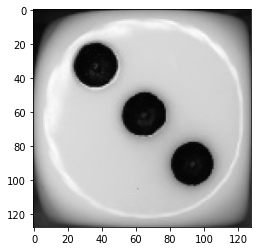

In [114]:
path = r"./dices/normal/"

#Choose randomly a file

random_filename = random.choice([
    x for x in os.listdir(path)
    if os.path.isfile(os.path.join(path, x))
])
print(random_filename)

img_original = cv2.imread(path+random_filename)

plt.imshow(img_original)
plt.show()

### Translate Images to right, left, up, down

In [166]:
def translate(img, direction, roll=True):
    
    shift=10
    img = img.copy()
    if direction == 'right':
        right_slice = img[:, -shift:].copy()
        img[:, shift:] = img[:, :-shift]
        if roll:
            img[:,:shift] = np.fliplr(right_slice)
    if direction == 'left':
        left_slice = img[:, :shift].copy()
        img[:, :-shift] = img[:, shift:]
        if roll:
            img[:, -shift:] = left_slice
    if direction == 'down':
        down_slice = img[-shift:, :].copy()
        img[shift:, :] = img[:-shift,:]
        if roll:
            img[:shift, :] = down_slice
    if direction == 'up':
        upper_slice = img[:shift, :].copy()
        img[:-shift, :] = img[shift:, :]
        if roll:
            img[-shift:,:] = upper_slice
    return img

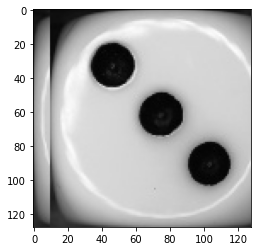

In [167]:
img_translate = translate(img_original,direction='right')

plt.imshow(img_translate)
plt.show()

### Rotate Images

In [91]:
def rotate_img(img):
    
    angle = random.randint(0,360)
    
    img = ndimage.rotate(img, angle, reshape=True)
    
    return img

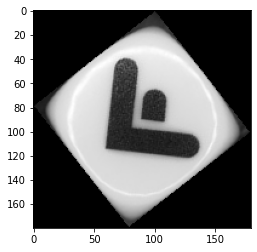

In [94]:
img_rotate = rotate_img(img_original)

plt.imshow(img_rotate)
plt.show()

### Random Noise

In [170]:
def gaussian_noise(img):
   
    row,col,ch= img.shape
    mean = 0
    var = 0.1
    sigma = var**0.5
    gauss = np.random.random(mean,sigma,(row,col,ch))
    gauss = gauss.reshape(row,col,ch)
    noisy = img + gauss
    return noisy

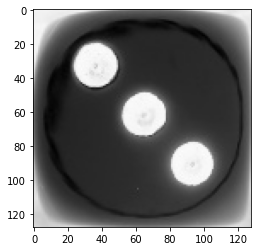

In [171]:
img_gaussian_noise = gaussian_noise1(img_original)

plt.imshow((img_gaussian_noise * 255).astype(np.uint8))
plt.show()

### Generate Images



In [172]:
def generate_image(path,name:int):
    
    number = str(name)
    
    random_filename = random.choice([
        x for x in os.listdir(path)
            if os.path.isfile(os.path.join(path, x))
    ])
    
    img_original = cv2.imread(path+random_filename)
    
    img_translate = translate(img_original,direction ='left')
    
    cv2.imwrite('./dices/ab/translateleft'+number+'.jpg', img_translate )
    
    img_translate = translate(img_original,direction ='right')
    
    cv2.imwrite('./dices/ab/translateright'+number+'.jpg', img_translate )
    
    img_translate = translate(img_original,direction = 'up')
    
    cv2.imwrite('./dices/ab/translateup'+number+'.jpg', img_translate )
    
    img_translate = translate(img_original,direction ='down')
    
    cv2.imwrite('./dices/ab/translatedown'+number+'.jpg', img_translate )

    
    img_rotate = rotate_img(img_original)
    
    cv2.imwrite('./dices/ab/rotate'+number+'.jpg', img_rotate )


    img_gaussian_noise = gaussian_noise1(img_original)
    img_gaussian_noise = (img_gaussian_noise * 255).astype(np.uint8)
    
    cv2.imwrite('./dices/ab/gaussian_noise'+number+'.jpg', img_gaussian_noise )   
    

In [174]:
path = r"./dices/normal/"

for i in range(100):
    generate_image(path,i)

In [175]:
path = r"./dices/abnormal/"

for i in range(100):
    generate_image(path,i+100) 